# Test for ABC with updating prior

## Simulation and ABC Method

## Assessment of ABC results

In [2]:
import pandas as pd
from ggplot import *
import numpy as np
import os

/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Combine results into one dataframe

In [24]:
def create_PosteriorCharacteristics_df(observed_file_name, PosteriorCharacteristics_file_name, obs, chrom):
    observed_df = pd.read_csv(observed_file_name, sep='\t')
    observed_df.drop([col for col in observed_df.columns if 'CGI' in col], axis=1, inplace=True)
    PosteriorCharacteristics_df = pd.read_csv(PosteriorCharacteristics_file_name, sep='\t')
    
    PosteriorCharacteristics_observed_df = pd.concat([observed_df, PosteriorCharacteristics_df], axis=1)
    PosteriorCharacteristics_observed_df['obs'] = str(obs)
    PosteriorCharacteristics_observed_df['chr'] = str(chrom)
    PosteriorCharacteristics_observed_df.drop('dataSet', axis=1, inplace=True)
    return PosteriorCharacteristics_observed_df


def create_combined_df(file_name):
    combined_df = pd.read_csv(file_name, sep='\t')
    combined_df['obs'] = combined_df['obs'].astype(str)
    combined_df['chr'] = combined_df['chr'].astype(str)
    return combined_df

In [72]:
results_path = '.'
combined_PosteriorCharacteristics_observed_name = '{}/ABC_update_estimate_10pls_100ret_model0_MarginalPosteriorCharacteristics_combined.txt'.format(results_path)
combined_PosteriorDensities_name = '{}/ABC_update_estimate_10pls_100ret_model0_MarginalPosteriorDensities_Obs0_combined.txt'.format(results_path)

obs_list = list(range(1, 101))
chrom_list = list(range(1, 11))

if os.path.isfile(combined_PosteriorCharacteristics_observed_name) and os.path.isfile(combined_PosteriorDensities_name):
    combined_PosteriorCharacteristics_observed_df = create_combined_df(combined_PosteriorCharacteristics_observed_name)
    combined_PosteriorDensities_df = create_combined_df(combined_PosteriorDensities_name)                            
else:
    print('{} or {} does not exist')
    exit()
parameters = list(combined_PosteriorCharacteristics_observed_df)[0:7]

In [27]:
combined_PosteriorCharacteristics_observed_df.head()

A             B             C           AN         AB_t  \
0  50616.323806  3.134282e+06  3.035583e+06  3012.142973  3271.717532   
1  50616.323806  3.134282e+06  3.035583e+06  3012.142973  3271.717532   
2  50616.323806  3.134282e+06  3.035583e+06  3012.142973  3271.717532   
3  50616.323806  3.134282e+06  3.035583e+06  3012.142973  3271.717532   
4  50616.323806  3.134282e+06  3.035583e+06  3012.142973  3271.717532   

          AC_t         AN_t   A_mode   A_mean  A_median ...   \
0  1998.433504  1481.963069  60907.6  57157.6   59181.3 ...    
1  1998.433504  1481.963069  61816.6  61122.5   62427.9 ...    
2  1998.433504  1481.963069  89997.4  75189.0   77290.8 ...    
3  1998.433504  1481.963069  85745.9  72687.7   74628.7 ...    
4  1998.433504  1481.963069  78620.4  69933.6   72841.7 ...    

   AN_t_HDI50_lower  AN_t_HDI50_upper  AN_t_HDI90_lower  AN_t_HDI90_upper  \
0           848.989           1352.53           517.679           1756.14   
1          1068.810           1349.08           863.838           1550.37   
2          1200.180           1413.70          1039.530           1566.12   
3          1178.440           1348.63          1054.950           1468.58   
4          1285.960           1465.67          1158.030           1590.11   

   AN_t_HDI95_lower  AN_t_HDI95_upper  AN_t_HDI99_lower  AN_t_HDI99_upper  \
0           405.281           1884.33           186.370           2123.00   
1           805.273           1623.64           688.144           1767.84   
2           990.729           1620.74           893.121           1724.54   
3          1012.750           1504.55           931.787           1576.54   
4          1111.500           1623.25          1026.670           1685.83   

   obs  chr  
0    1    1  
1    1    2  
2    1    3  
3    1    4  
4    1    5  

[5 rows x 142 columns]

In [28]:
combined_PosteriorDensities_df.head()

number        A   density          B     density.1         C     density.2  \
0       1  10000.4  0.000005    1089.52  2.742700e-08   10199.0  1.876910e-07   
1       2  10909.5  0.000005   51703.50  3.147420e-08   60711.1  2.031000e-07   
2       3  11818.5  0.000006  102317.00  3.588020e-08  111223.0  2.181410e-07   
3       4  12727.6  0.000006  152931.00  4.063100e-08  161735.0  2.325900e-07   
4       5  13636.6  0.000006  203545.00  4.570300e-08  212248.0  2.462330e-07   

        AN     density.3     AB_t     density.4     AC_t  density.5  \
0  1000.36  2.567090e-10  1600.03  2.124900e-20  1600.02   0.000913   
1  1091.26  7.912280e-10  1625.28  7.952850e-20  1625.27   0.001116   
2  1182.17  2.326940e-09  1650.53  2.906300e-19  1650.52   0.001334   
3  1273.07  6.569500e-09  1675.79  1.037070e-18  1675.78   0.001558   
4  1363.98  1.790230e-08  1701.04  3.613580e-18  1701.03   0.001780   

         AN_t  density.6 obs chr  
0    0.008756   0.000009   1   1  
1   41.422400   0.000013   1   1  
2   82.836100   0.000018   1   1  
3  124.250000   0.000025   1   1  
4  165.663000   0.000034   1   1

### Functions to calculate things

In [29]:
def calc_estimate_dist(param, combined_PosteriorCharacteristics_observed_df):
    estimate = '{}_mode'.format(param)
    estimate_dist_name = '{}_estimate_dist'.format(param)
    combined_PosteriorCharacteristics_observed_df[estimate_dist_name] = (combined_PosteriorCharacteristics_observed_df[estimate] - combined_PosteriorCharacteristics_observed_df[param])**2
    combined_PosteriorCharacteristics_observed_df.head()
    return combined_PosteriorCharacteristics_observed_df


def calc_HPDI_dist(param, combined_PosteriorCharacteristics_observed_df):
    HDI95_upper_name = '{}_HDI95_upper'.format(param)
    HDI95_lower_name = '{}_HDI95_lower'.format(param)
    HPDI_dist_name = '{}_HPDI_dist'.format(param)
    HDI95_upper = combined_PosteriorCharacteristics_observed_df[HDI95_upper_name]
    HDI95_lower = combined_PosteriorCharacteristics_observed_df[HDI95_lower_name]
    true = combined_PosteriorCharacteristics_observed_df[param]
    
    combined_PosteriorCharacteristics_observed_df[HPDI_dist_name] = np.where((true < HDI95_lower) & (true > HDI95_upper), ((true - HDI95_lower)**2 + (true - HDI95_upper)**2)*(-1), (true - HDI95_lower)**2 + (true - HDI95_upper)**2)    
    return combined_PosteriorCharacteristics_observed_df


def proportion_smaller_chr1(df, column, chrom):
    chr1 = df[column].loc[(df['chr'] == '1')].reset_index(drop=True)
    other_chr = df[column].loc[(df['chr'] == str(chrom))].reset_index(drop=True)

    proportion = (float(sum(chr1 > other_chr) - sum(chr1 < 0)))/100
    return proportion

In [30]:
for param in parameters:
    combined_PosteriorCharacteristics_observed_df = calc_estimate_dist(param, combined_PosteriorCharacteristics_observed_df)
    combined_PosteriorCharacteristics_observed_df = calc_HPDI_dist(param, combined_PosteriorCharacteristics_observed_df)
combined_PosteriorCharacteristics_observed_df.head()

A             B             C           AN         AB_t  \
0  50616.323806  3.134282e+06  3.035583e+06  3012.142973  3271.717532   
1  50616.323806  3.134282e+06  3.035583e+06  3012.142973  3271.717532   
2  50616.323806  3.134282e+06  3.035583e+06  3012.142973  3271.717532   
3  50616.323806  3.134282e+06  3.035583e+06  3012.142973  3271.717532   
4  50616.323806  3.134282e+06  3.035583e+06  3012.142973  3271.717532   

          AC_t         AN_t   A_mode   A_mean  A_median       ...        \
0  1998.433504  1481.963069  60907.6  57157.6   59181.3       ...         
1  1998.433504  1481.963069  61816.6  61122.5   62427.9       ...         
2  1998.433504  1481.963069  89997.4  75189.0   77290.8       ...         
3  1998.433504  1481.963069  85745.9  72687.7   74628.7       ...         
4  1998.433504  1481.963069  78620.4  69933.6   72841.7       ...         

   C_estimate_dist   C_HPDI_dist  AN_estimate_dist  AN_HPDI_dist  \
0     5.610864e+12  1.096697e+13      28875.194478  1.198178e+06   
1     3.859784e+12  1.103357e+13      68030.737972  7.897036e+05   
2     3.028227e+11  1.035323e+13      45142.237528  8.380370e+05   
3     1.985262e+12  1.014377e+13         12.866762  5.398069e+05   
4     1.845477e+12  1.008476e+13       1245.174269  4.110318e+05   

   AB_t_estimate_dist  AB_t_HPDI_dist  AC_t_estimate_dist  AC_t_HPDI_dist  \
0        11250.321342   318880.241613        21284.914419   178791.384380   
1        25999.133490   231642.253614        22645.284883   146732.908528   
2          272.001501   122433.473526        16132.430120   125870.349804   
3         1775.144861    91225.271044         5854.316247    83273.930517   
4         7709.273389    85201.836883         3503.870879    77067.558543   

   AN_t_estimate_dist  AN_t_HPDI_dist  
0       164189.527273    1.321143e+06  
1        79176.431621    4.779818e+05  
2        30280.548245    2.605699e+05  
3        49864.260705    2.206711e+05  
4         9536.121920    1.572049e+05  

[5 rows x 156 columns]

### Functions to plot things

In [31]:
def boxplot_estimate_dist(param, combined_PosteriorCharacteristics_observed_df, y_axis_name):
    plot = ggplot(aes(x = 'chr', y = y_axis_name), data = combined_PosteriorCharacteristics_observed_df) + \
        geom_boxplot() + \
        theme_bw()
    return plot


def lineplot_estimate_dist(param, combined_PosteriorCharacteristics_observed_df, y_axis_name):
    plot = ggplot(aes(x = 'chr', y = y_axis_name, colour='obs'), data = combined_PosteriorCharacteristics_observed_df) + \
        geom_point() + \
        geom_line() + \
        theme_bw()
    return plot

### Proportion of estimates and HPDI on chromosomes >1 closer to true value than chr1

In [32]:
for param in parameters:
    estimate_dist_name = '{}_estimate_dist'.format(param)
    HPDI_dist_name = '{}_HPDI_dist'.format(param)
    proportion_smaller_estimate_dist = []
    proportion_smaller_HPDI_dist = []
    for chrom in range(2, 11):
        proportion_smaller_estimate_dist.append(proportion_smaller_chr1(combined_PosteriorCharacteristics_observed_df, estimate_dist_name, str(chrom)))
        proportion_smaller_HPDI_dist.append(proportion_smaller_chr1(combined_PosteriorCharacteristics_observed_df, HPDI_dist_name, str(chrom)))
print(proportion_smaller_estimate_dist)
print(proportion_smaller_HPDI_dist)

[0.49, 0.51, 0.56, 0.59, 0.57, 0.56, 0.65, 0.59, 0.62]
[0.91, 0.93, 0.94, 0.99, 0.98, 0.99, 0.98, 0.97, 0.98]


### Box plot of the squared difference of the parameter estimate from the observed value for each chromosome
Ideally, each successive chromosome should reduce the squared difference from the observed value

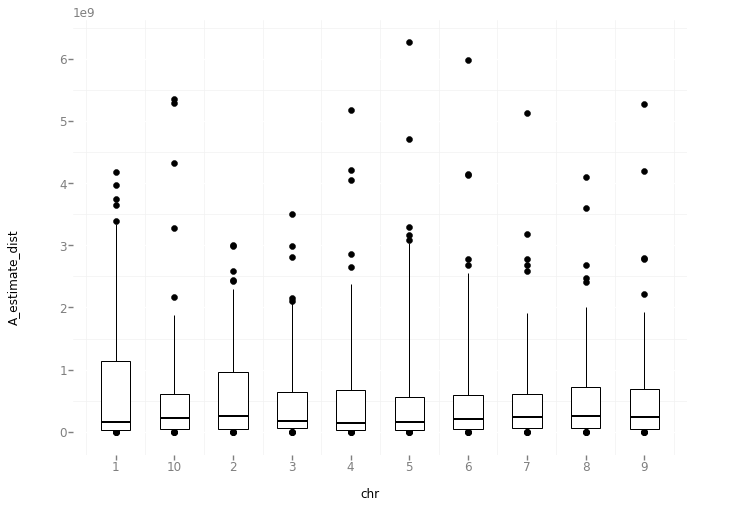

<ggplot: (-9223372036563226045)>


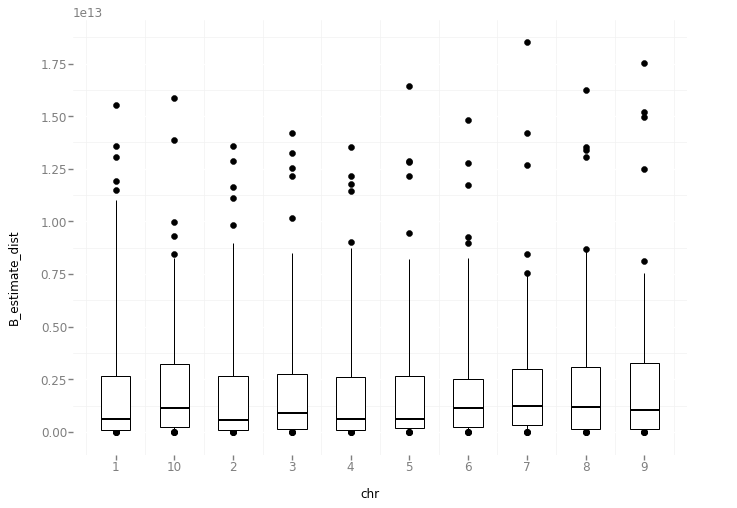

<ggplot: (7551196771)>


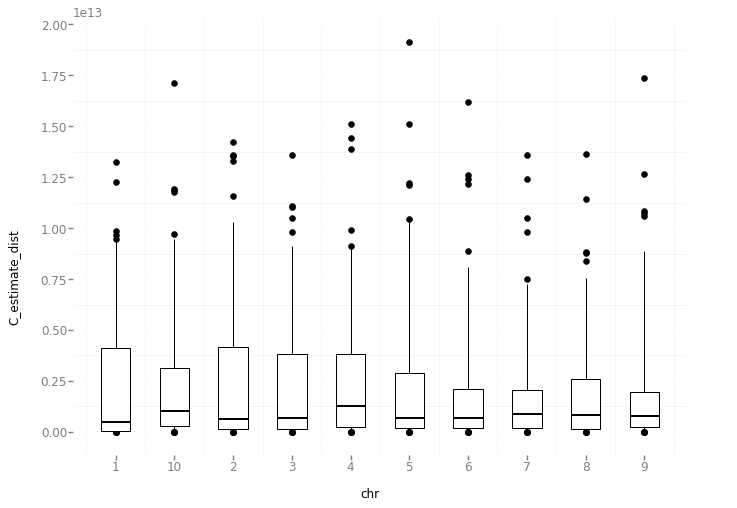

<ggplot: (-9223372029298992594)>


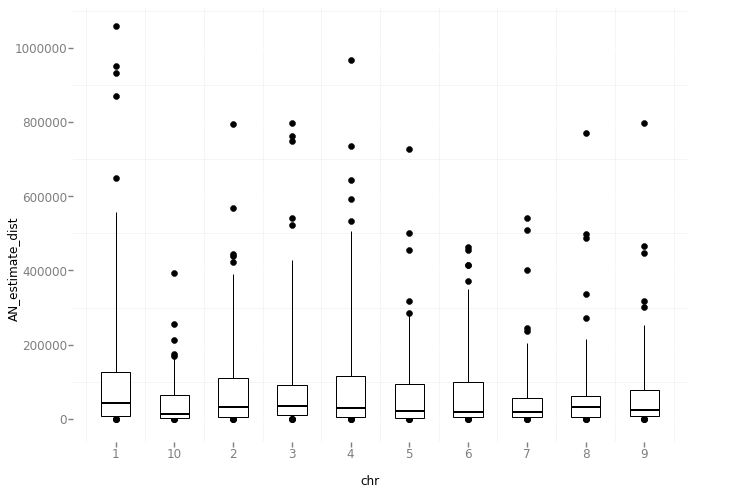

<ggplot: (-9223372029298662968)>


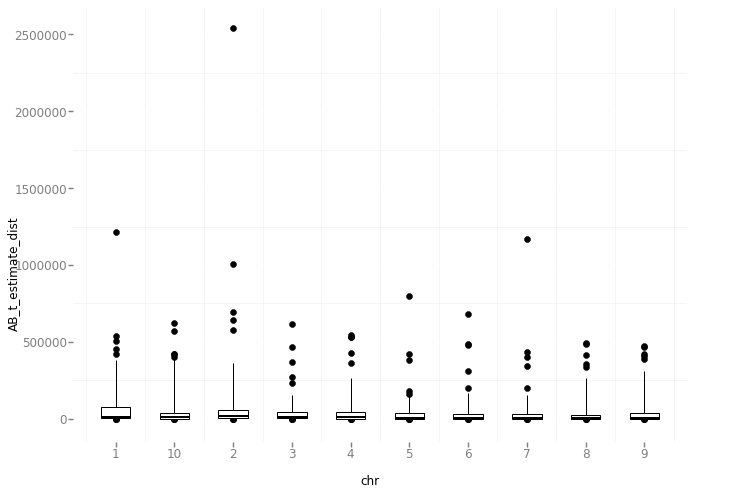

<ggplot: (-9223372029303591445)>


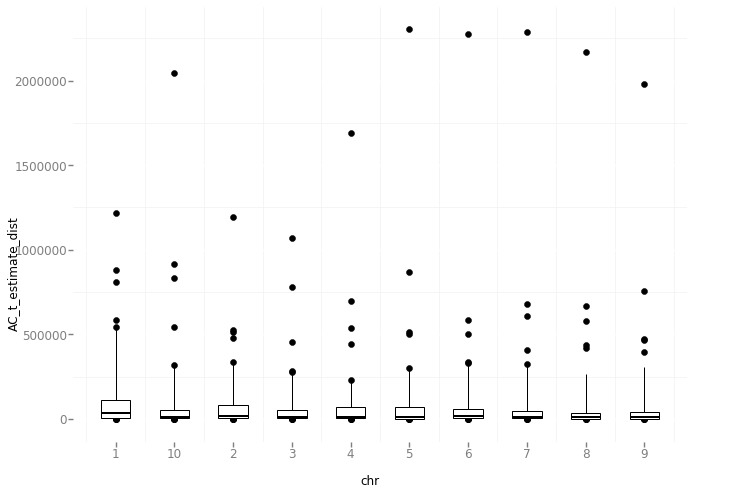

<ggplot: (7557003798)>


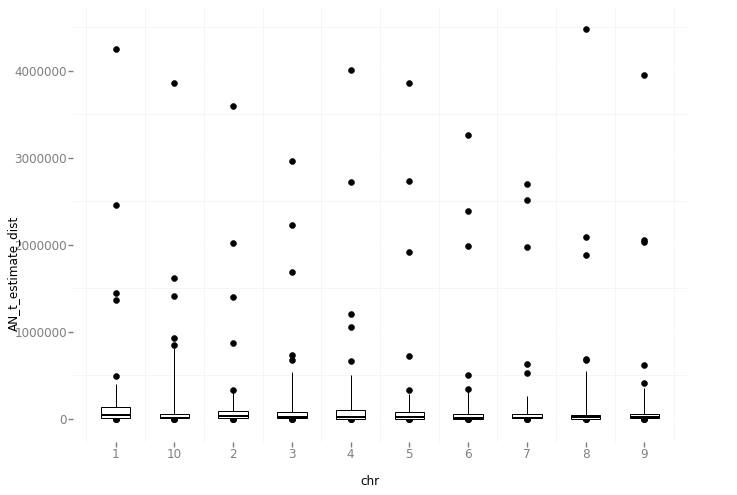

<ggplot: (-9223372029303589390)>


In [33]:
for param in parameters:
    estimate_dist_name = '{}_estimate_dist'.format(param)
    plot = boxplot_estimate_dist(param, combined_PosteriorCharacteristics_observed_df, estimate_dist_name)
    print(plot)

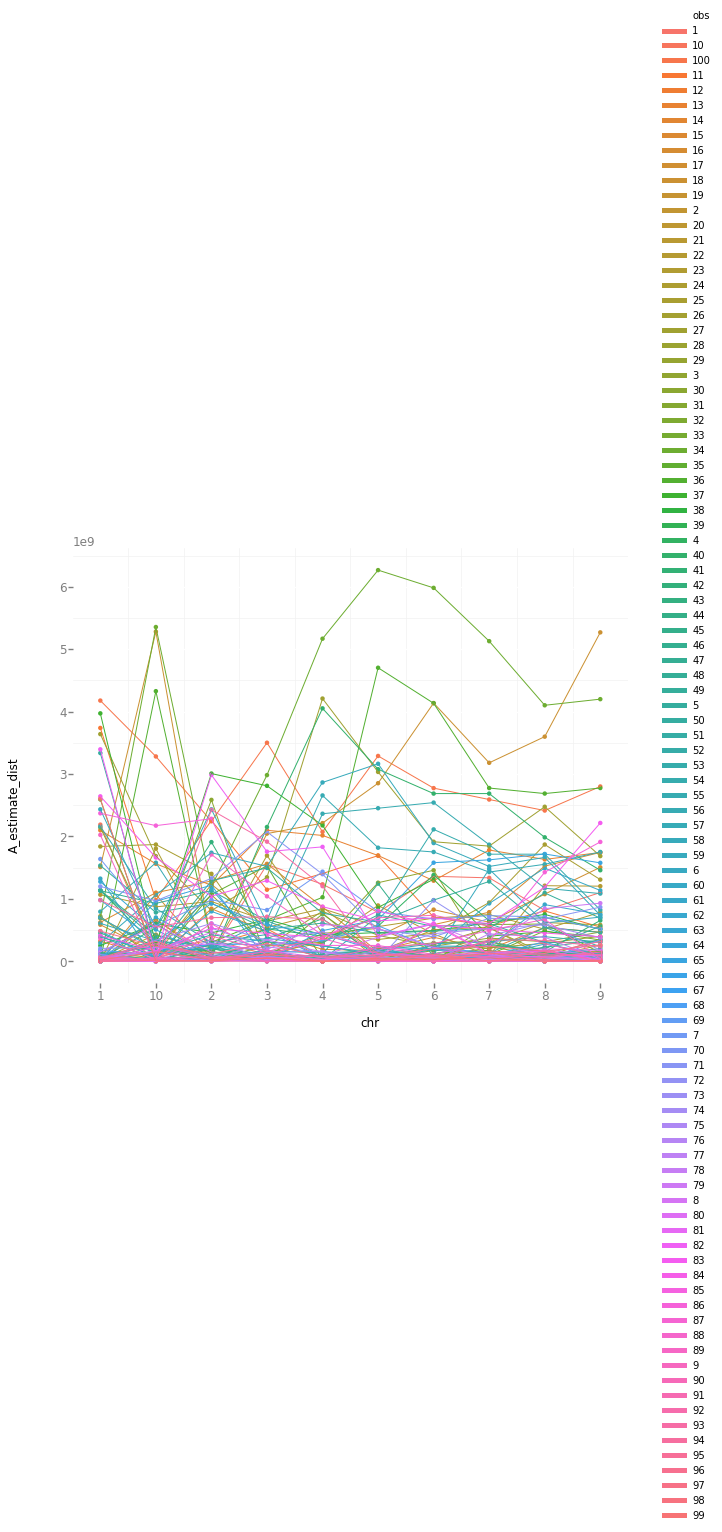

<ggplot: (7556070106)>


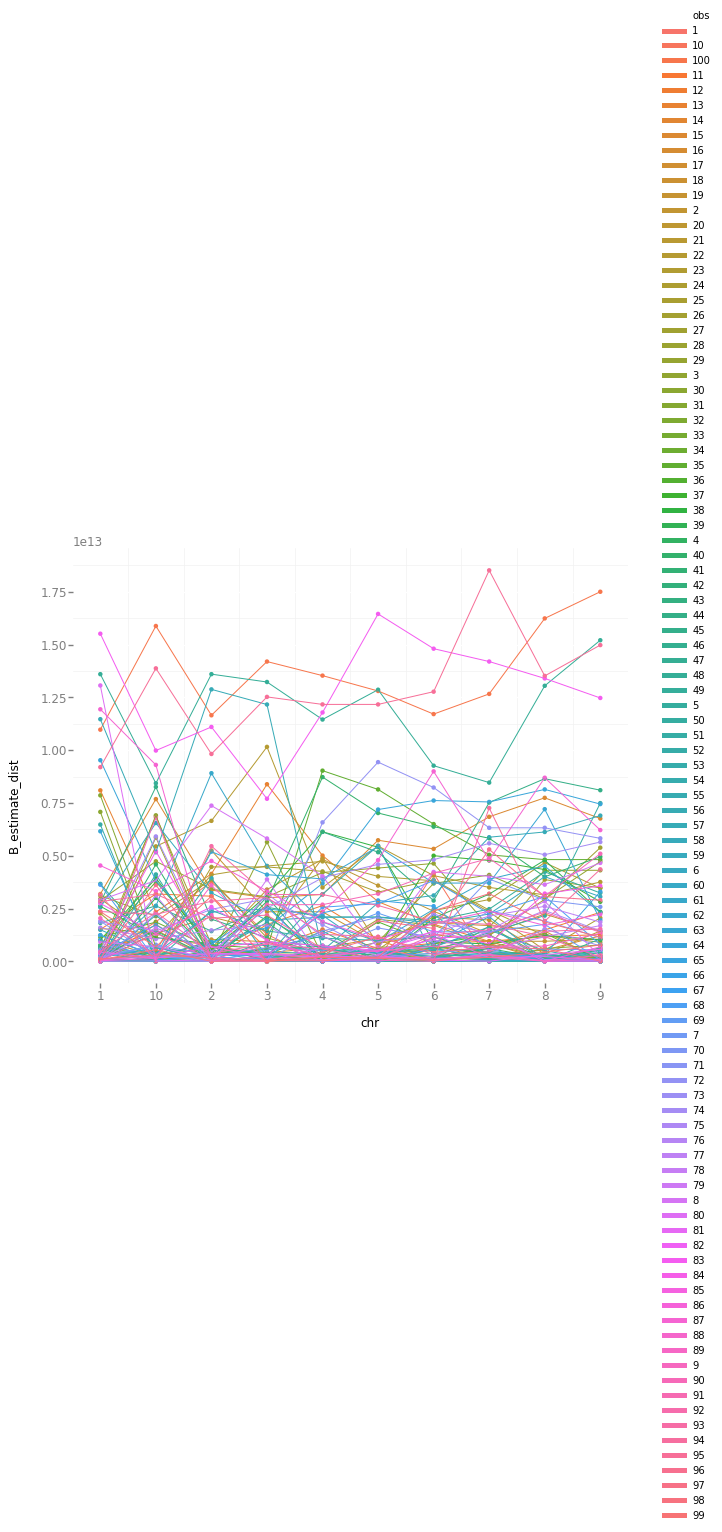

<ggplot: (-9223372036566411888)>


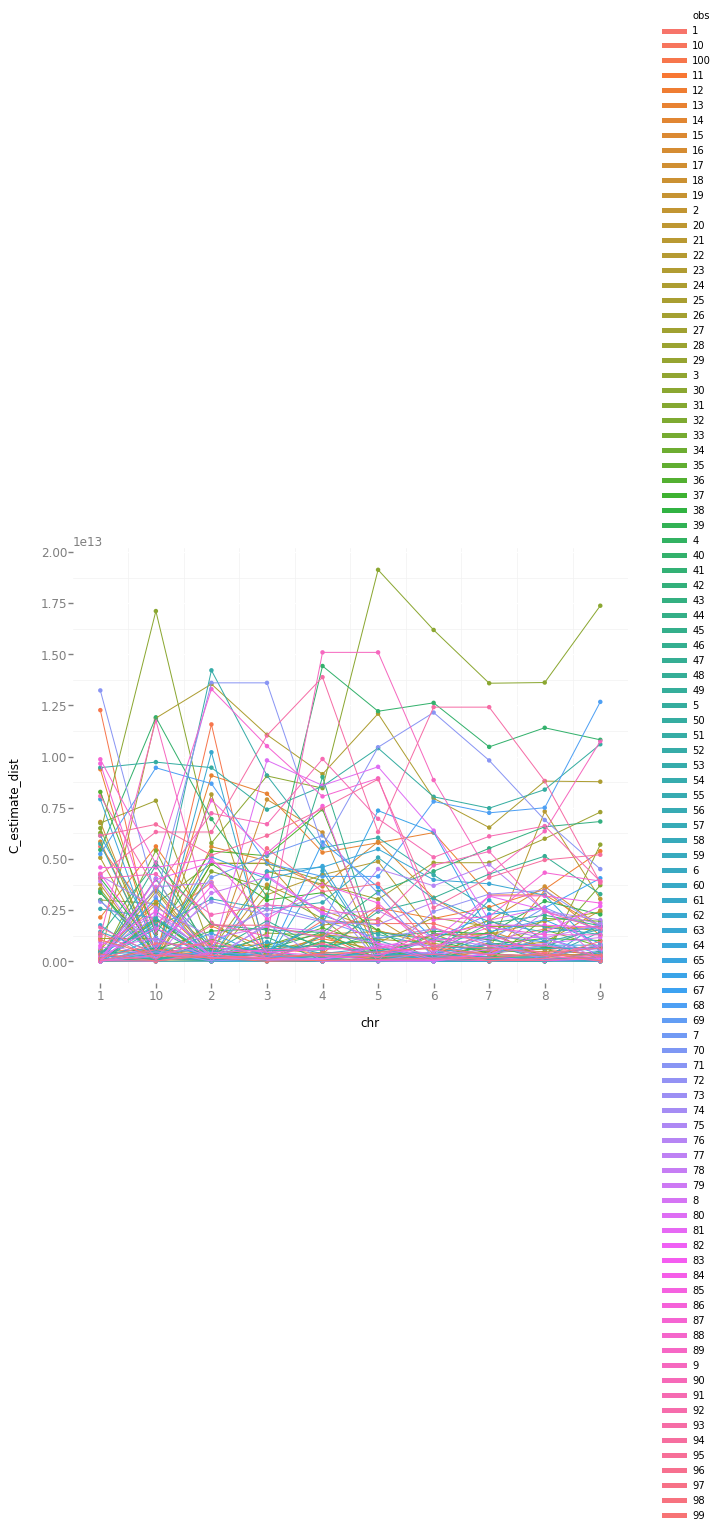

<ggplot: (-9223372036563136224)>


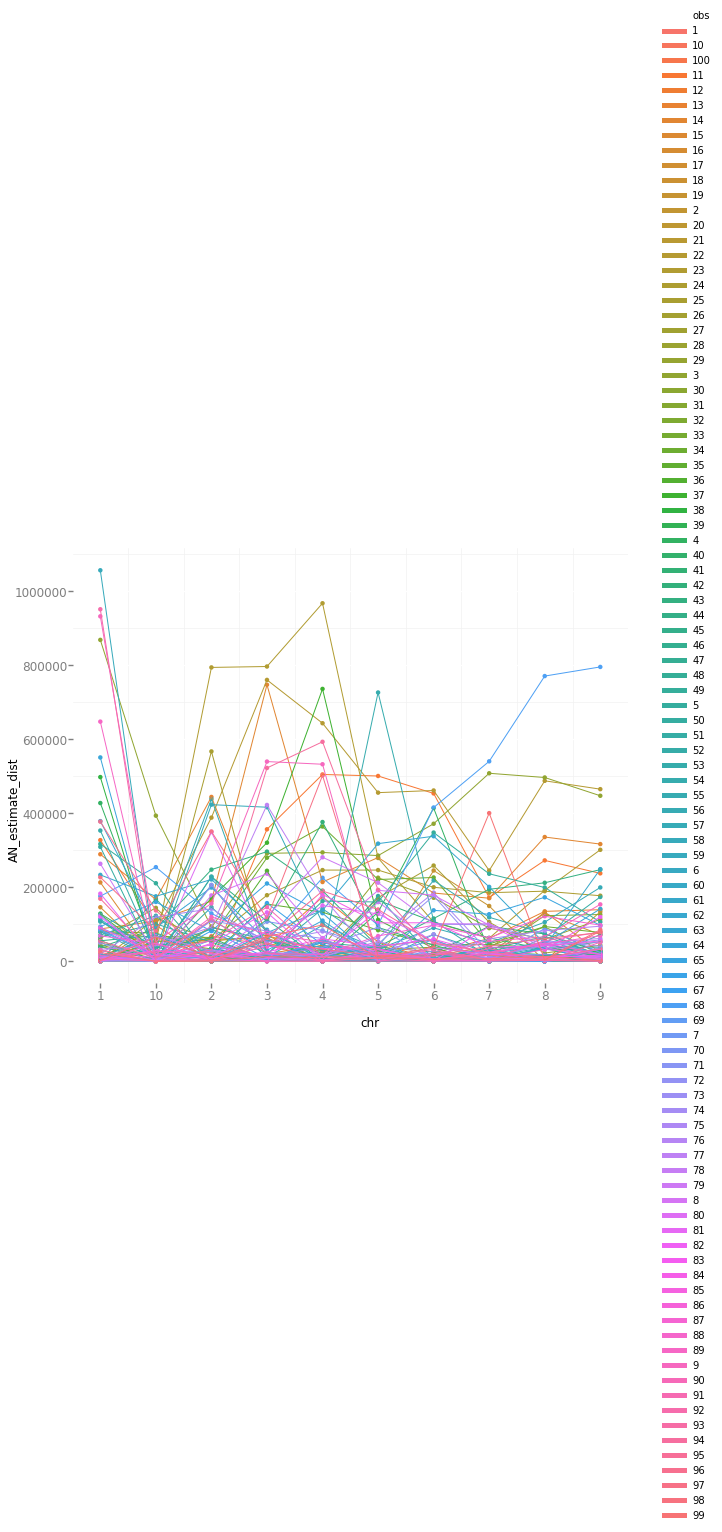

<ggplot: (-9223372036566287153)>


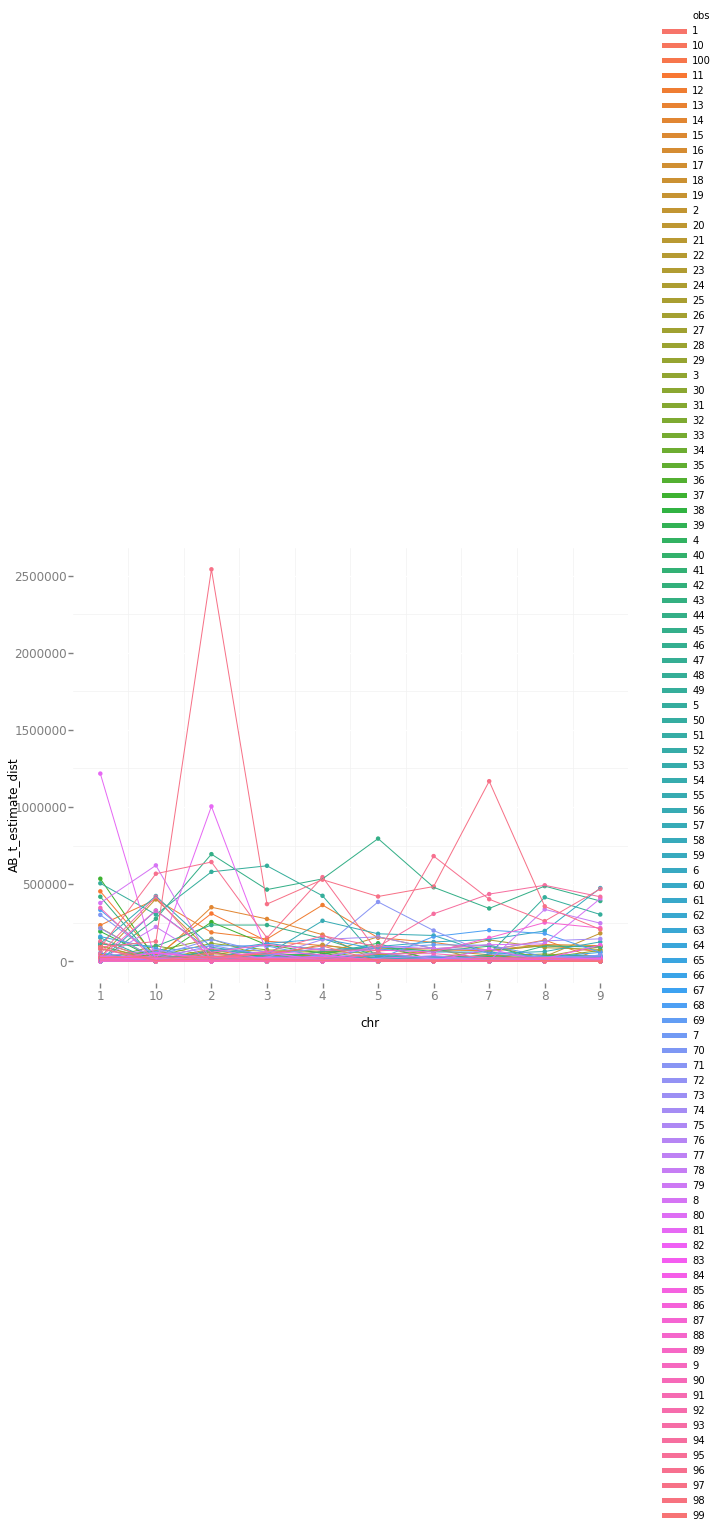

<ggplot: (-9223372029300531673)>


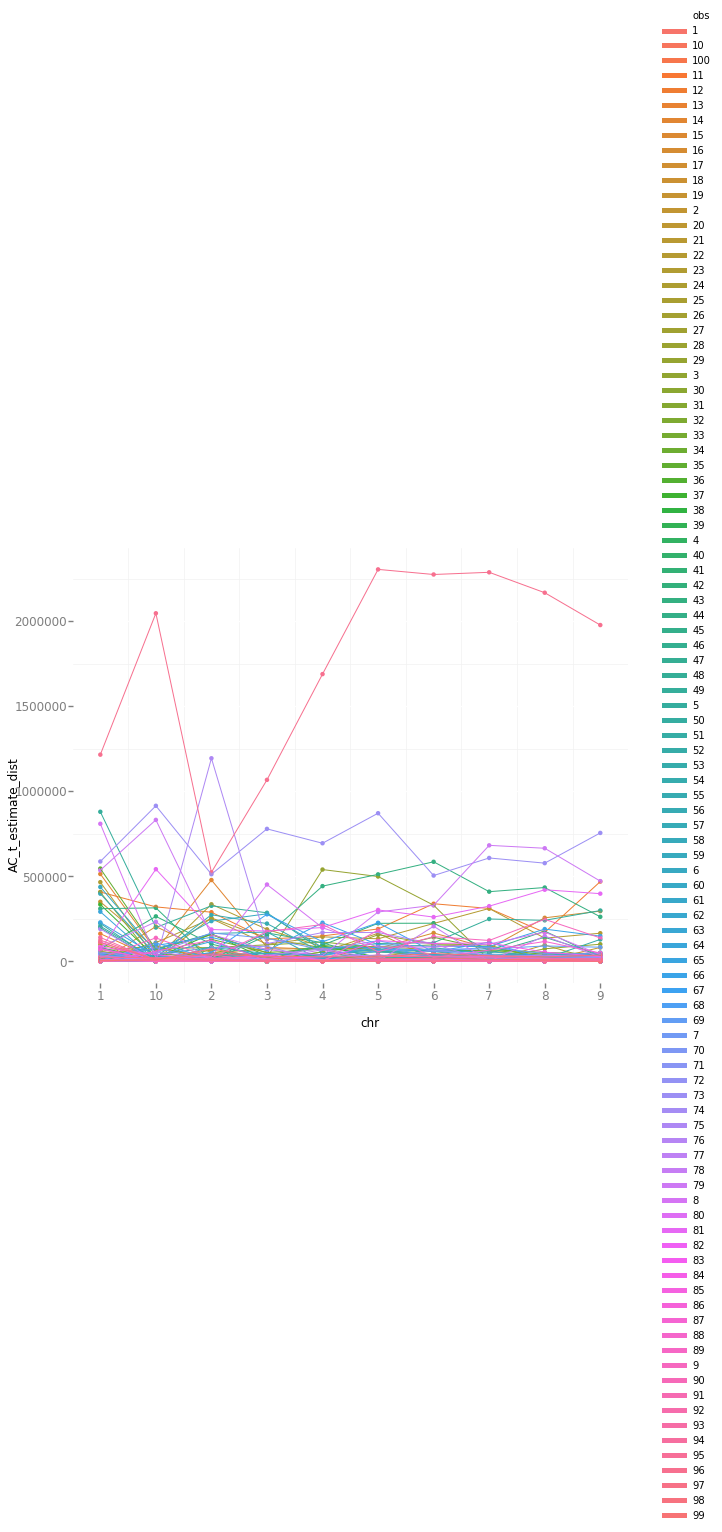

<ggplot: (-9223372036562709160)>


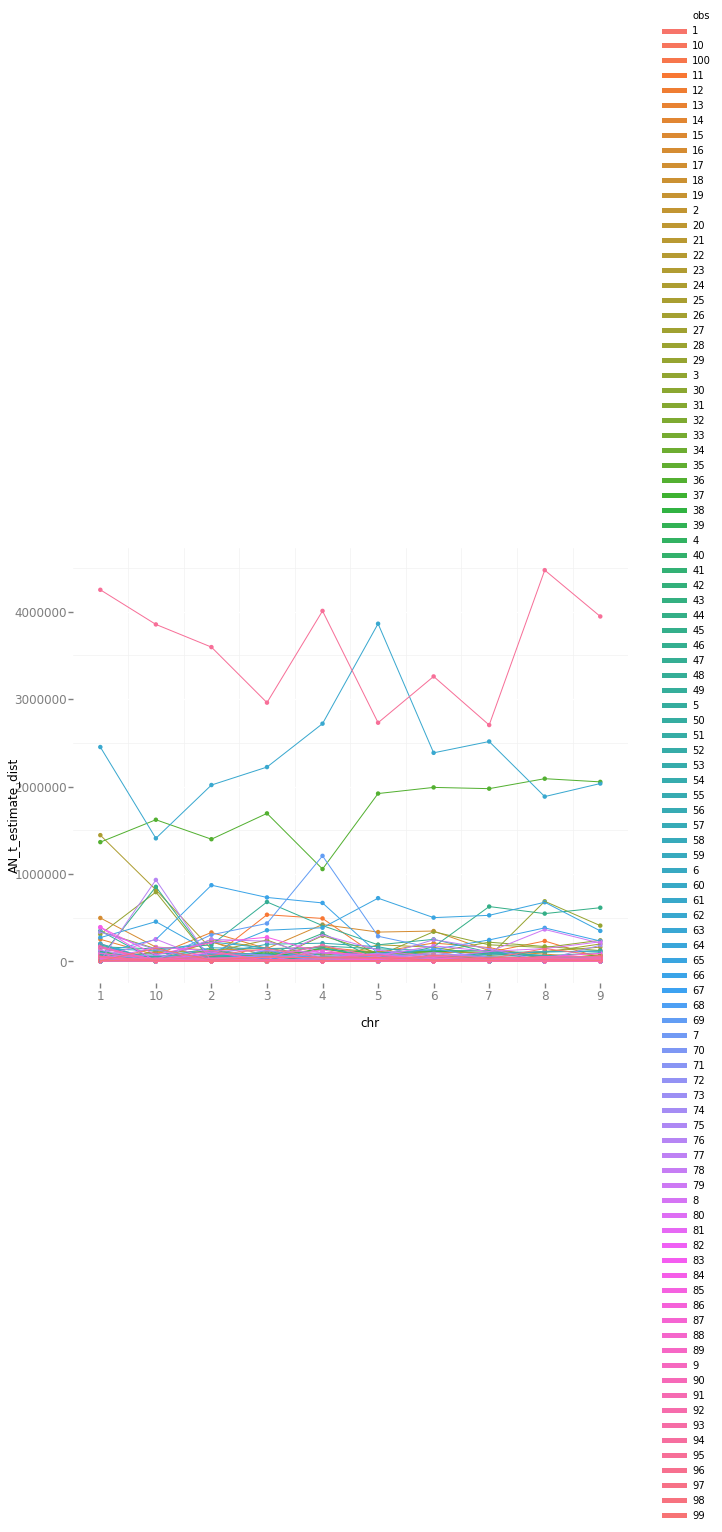

<ggplot: (283914290)>


In [34]:
for param in parameters:
    estimate_dist_name = '{}_estimate_dist'.format(param)
    plot = lineplot_estimate_dist(param, combined_PosteriorCharacteristics_observed_df, estimate_dist_name)    
    print(plot)

### Box plot of the squared difference of the HPDI_95 from the observed value for each chromosome
$(T-HL)^2 + (T-HH)^2$, if $T > HH$ or $T < HL$, then $((T-HL)^2 + (T-HH)^2)(-1)$

Ideally, each successive chromosome should reduce the squared difference from the observed value, down to 0. 

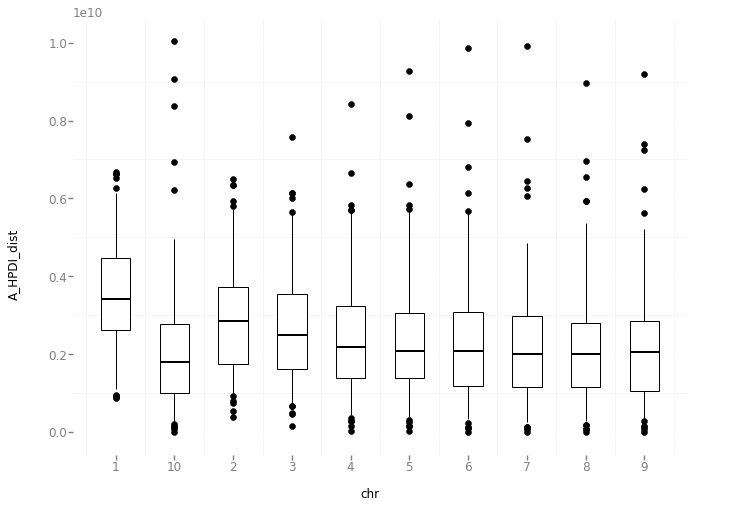

<ggplot: (-9223372036563215914)>


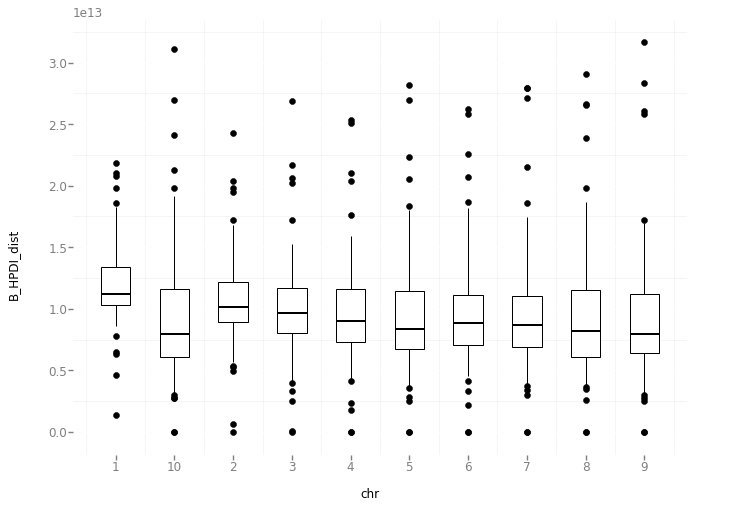

<ggplot: (7541586864)>


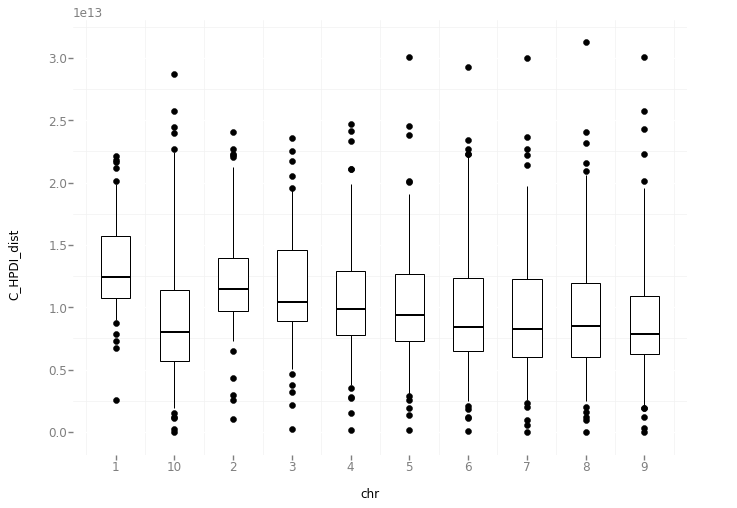

<ggplot: (-9223372029298810294)>


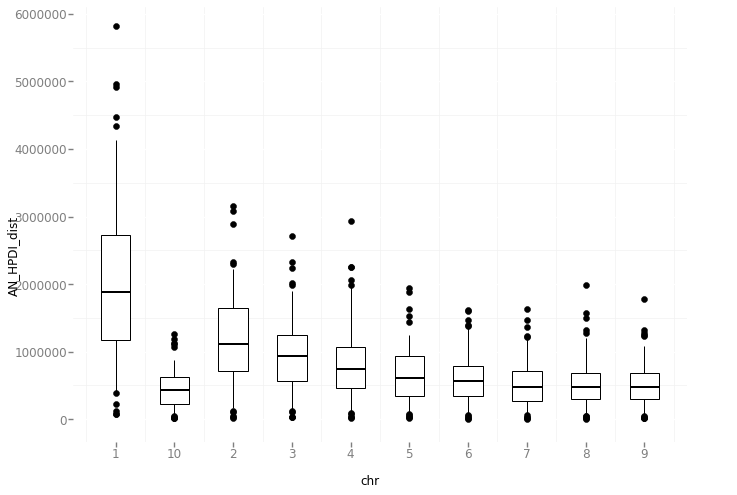

<ggplot: (-9223372029298981253)>


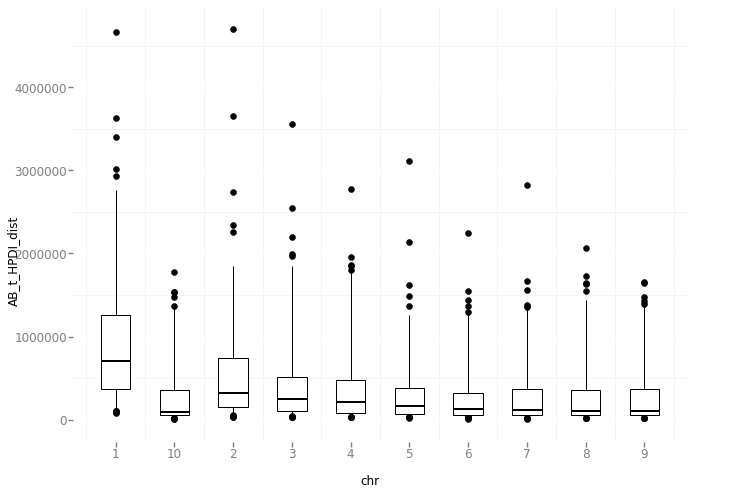

<ggplot: (7554192318)>


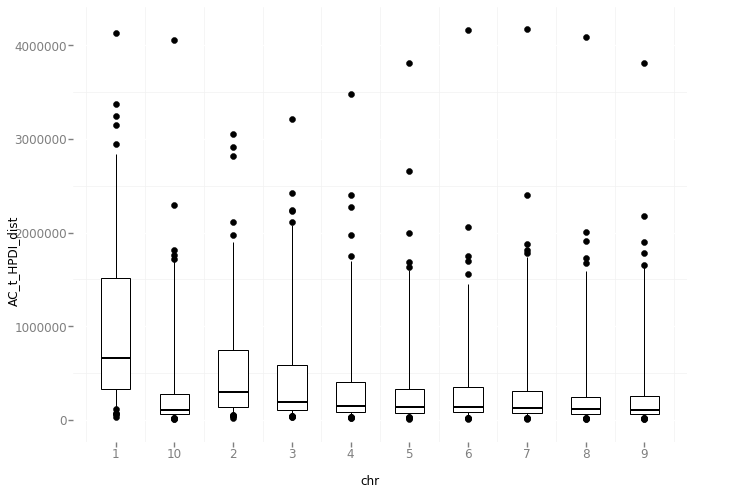

<ggplot: (-9223372029298978542)>


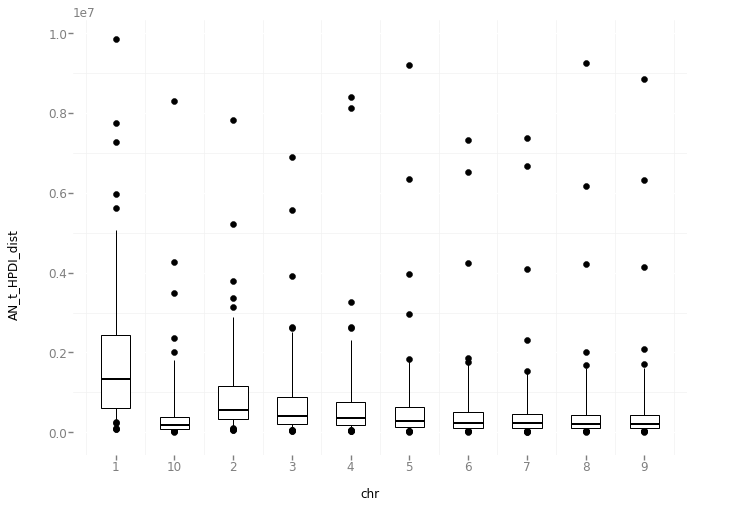

<ggplot: (-9223372036566353548)>


In [35]:
for param in parameters:
    HPDI_dist_name = '{}_HPDI_dist'.format(param)
    plot = boxplot_estimate_dist(param, combined_PosteriorCharacteristics_observed_df, HPDI_dist_name)
    print(plot)

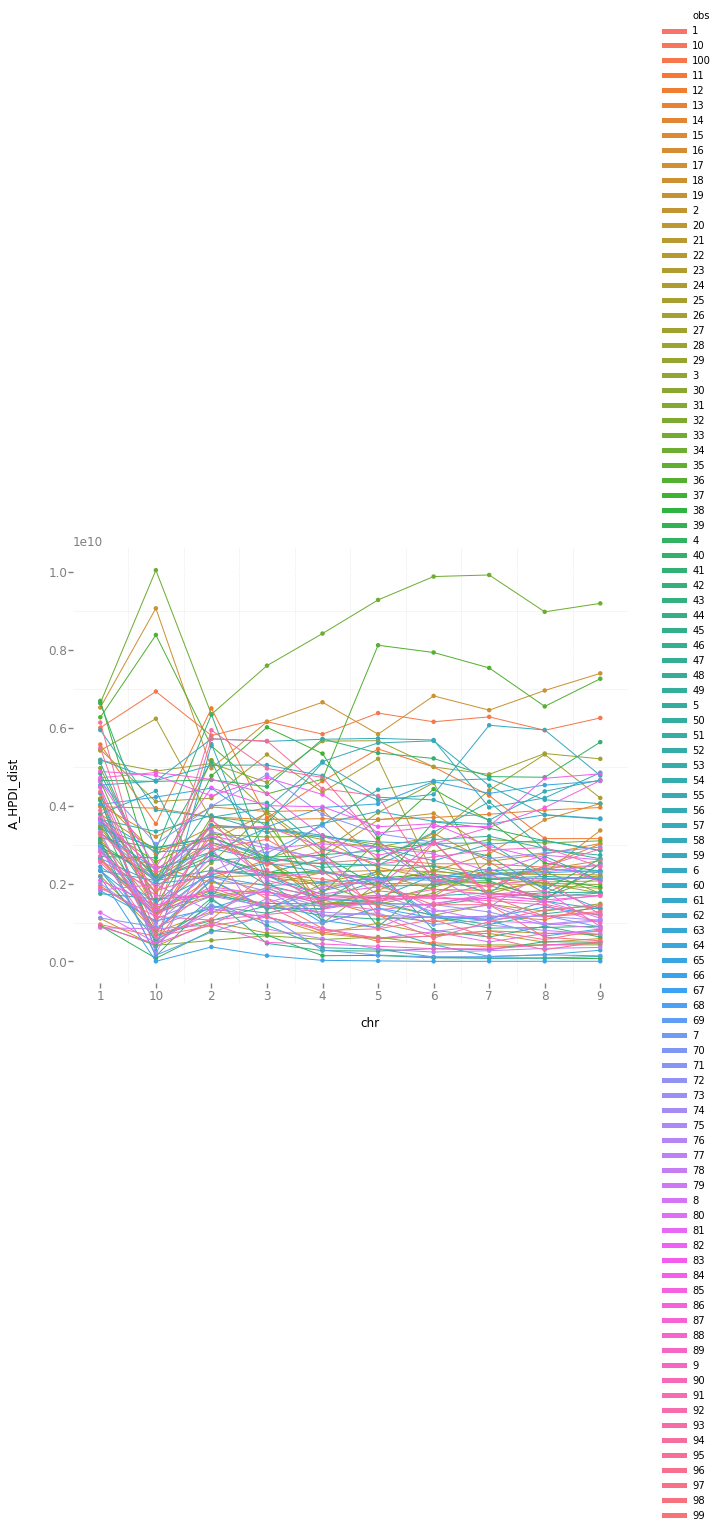

<ggplot: (-9223372029298705916)>


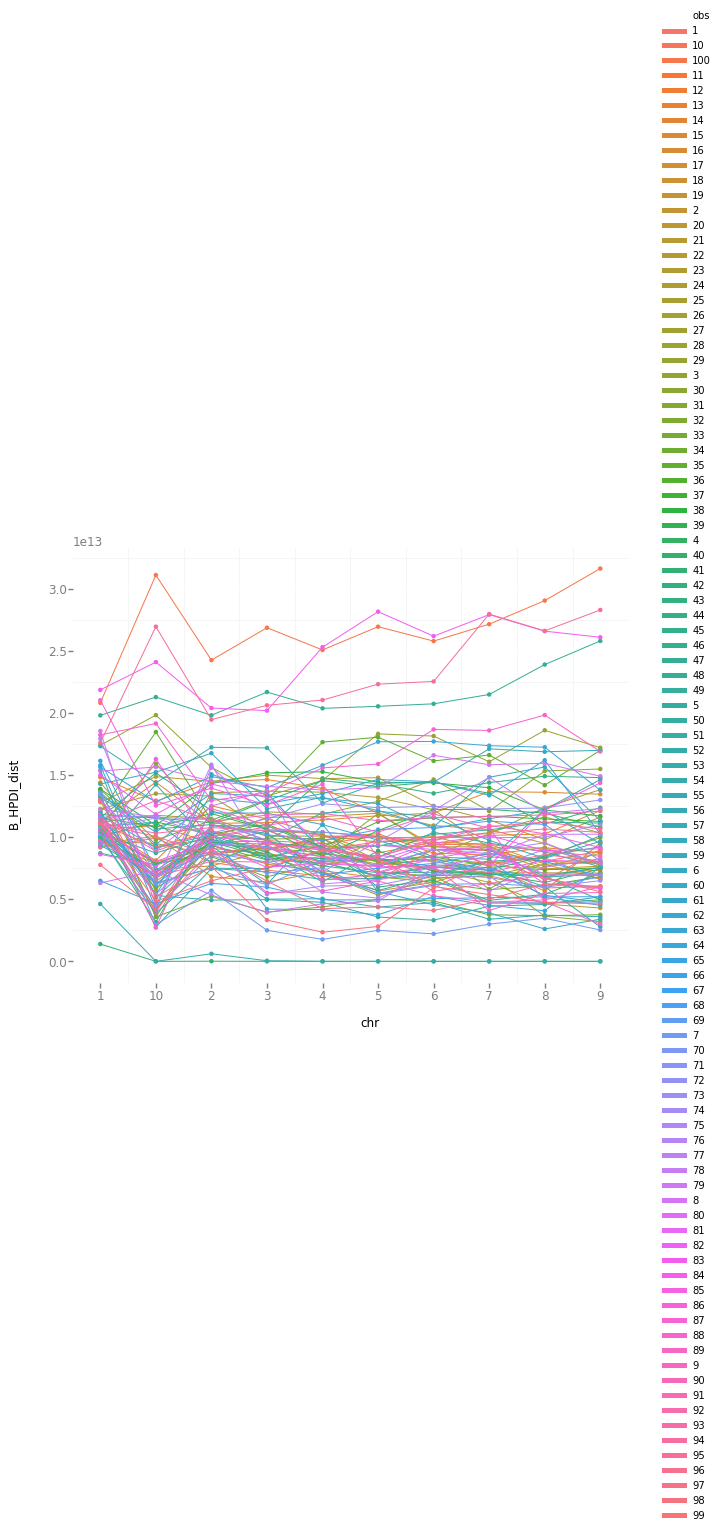

<ggplot: (7555805823)>


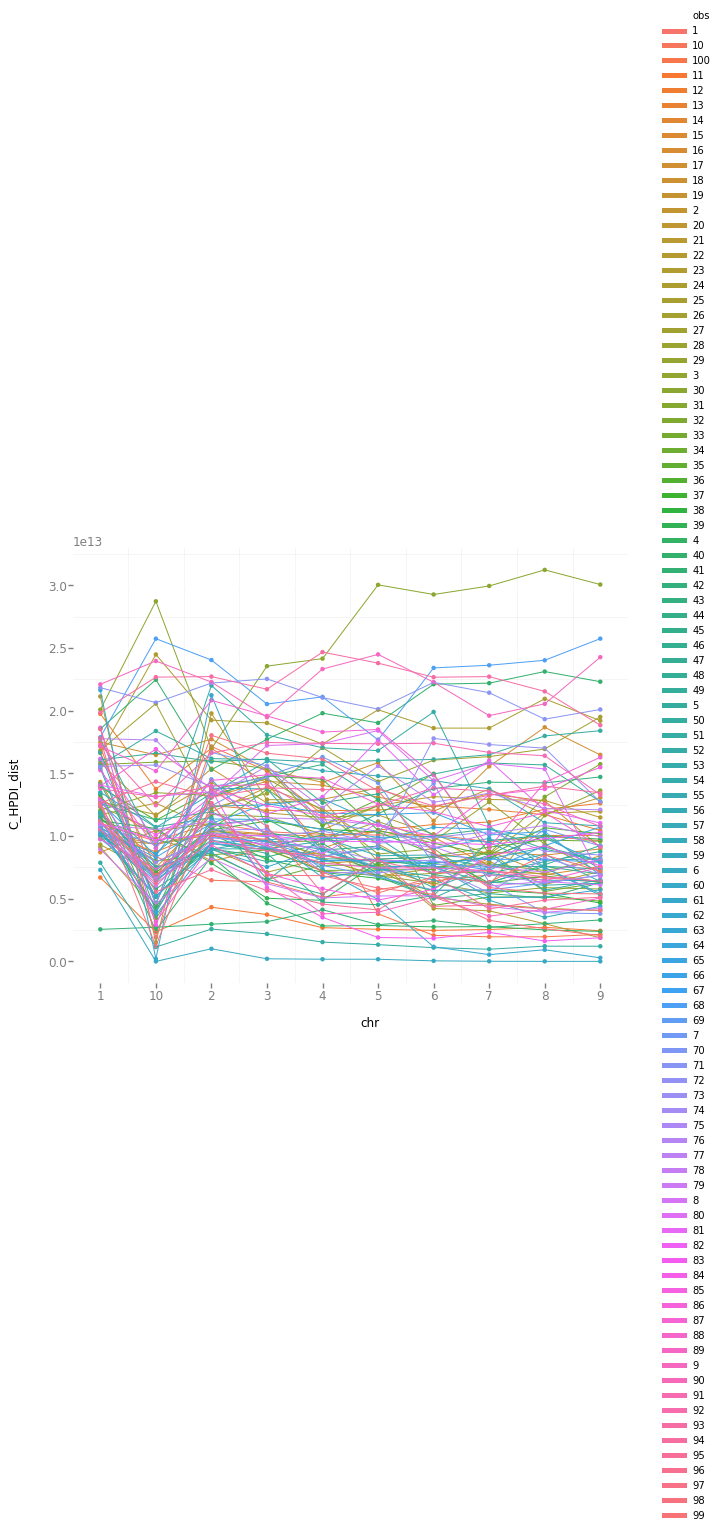

<ggplot: (288428075)>


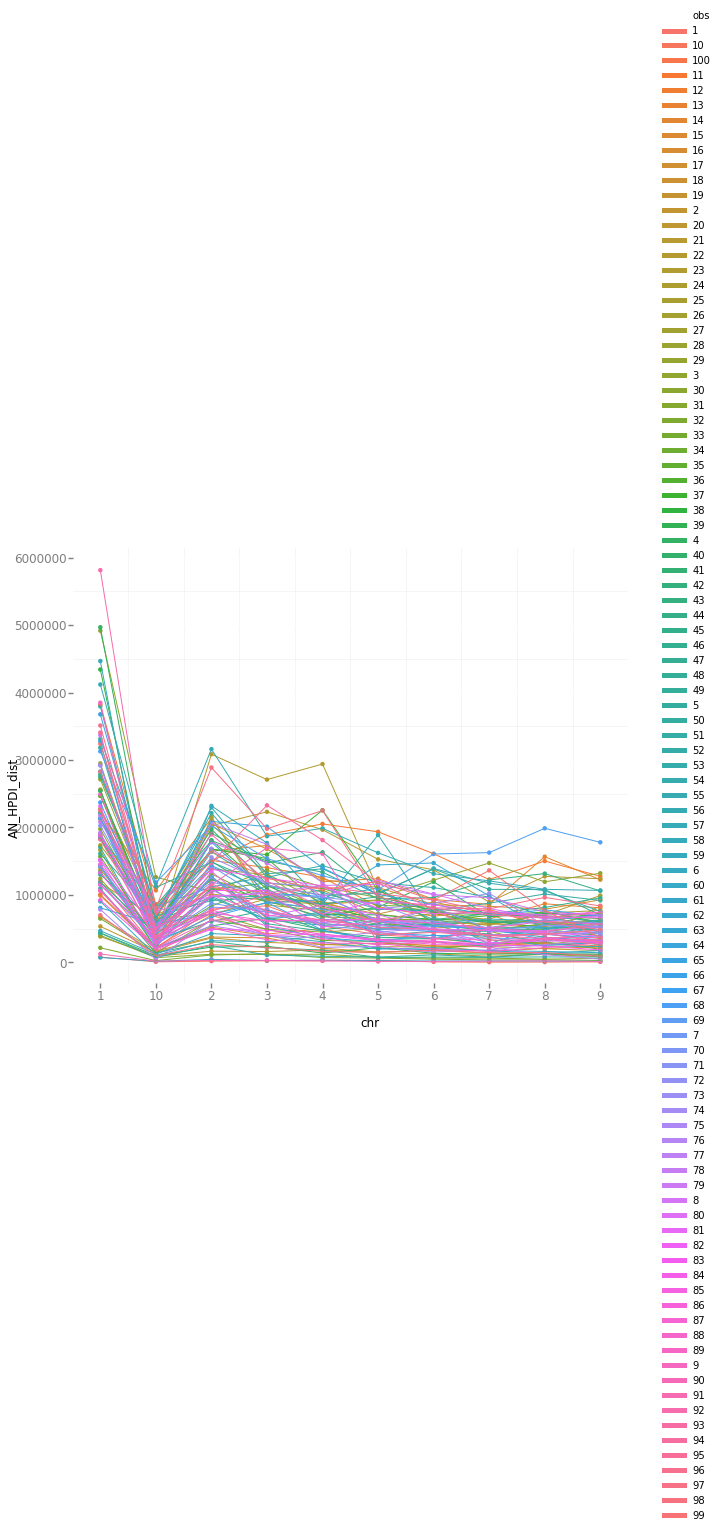

<ggplot: (-9223372029303052961)>


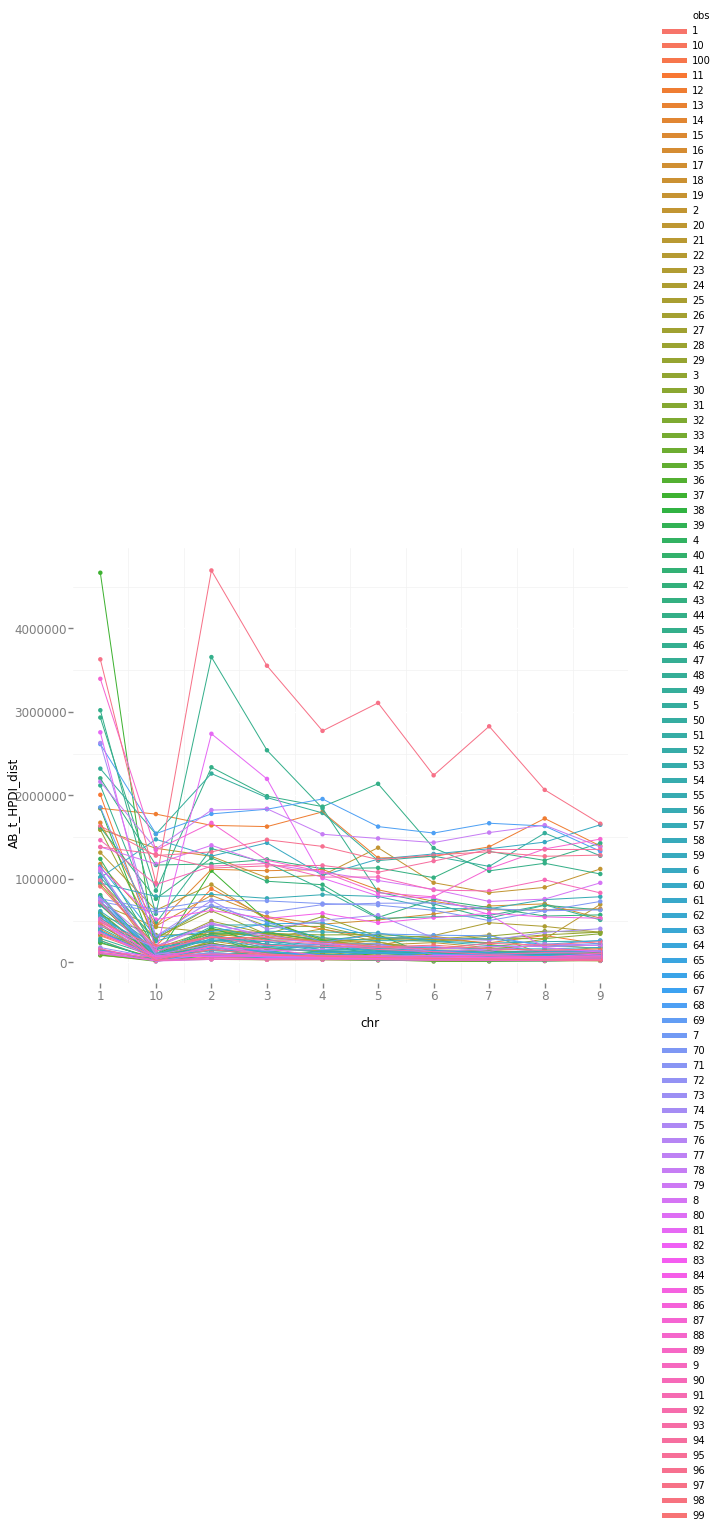

<ggplot: (288426248)>


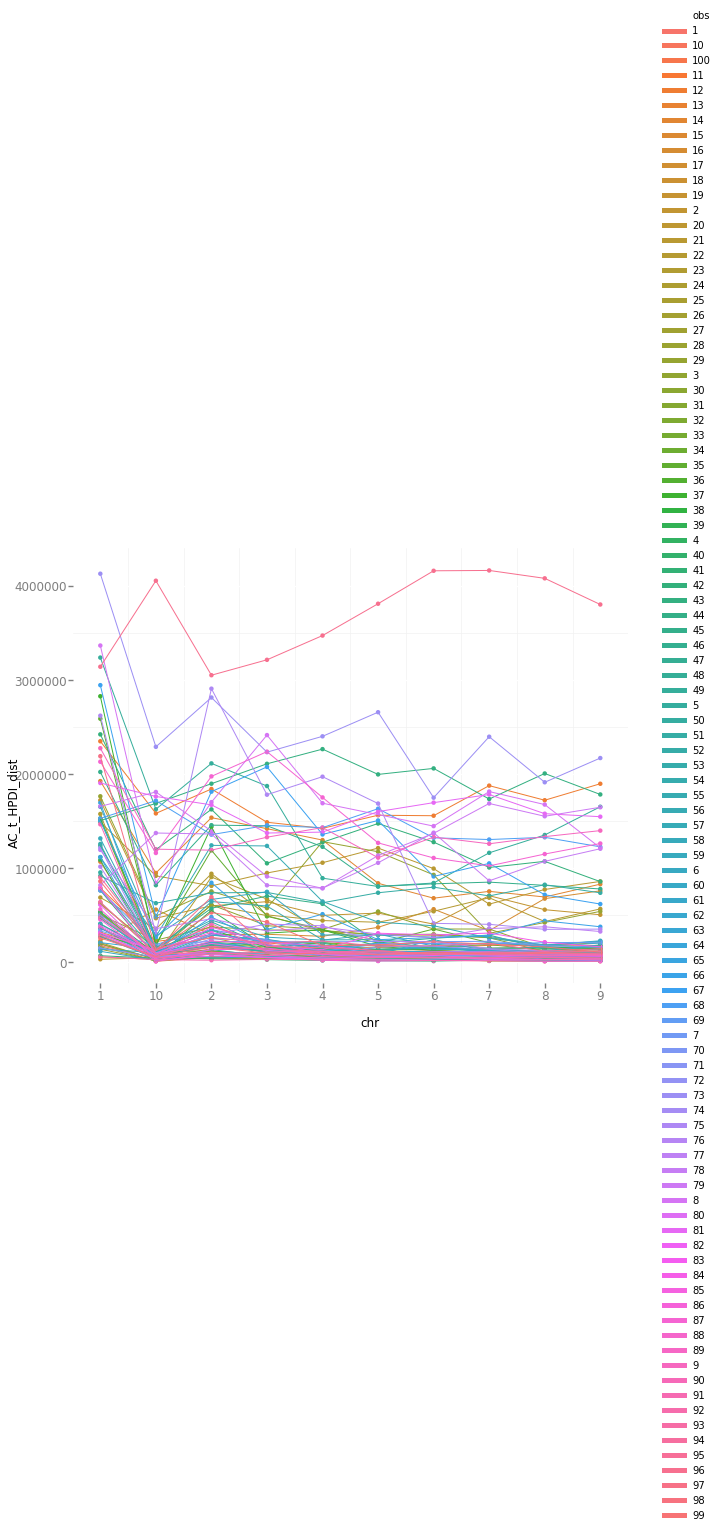

<ggplot: (-9223372036569403788)>


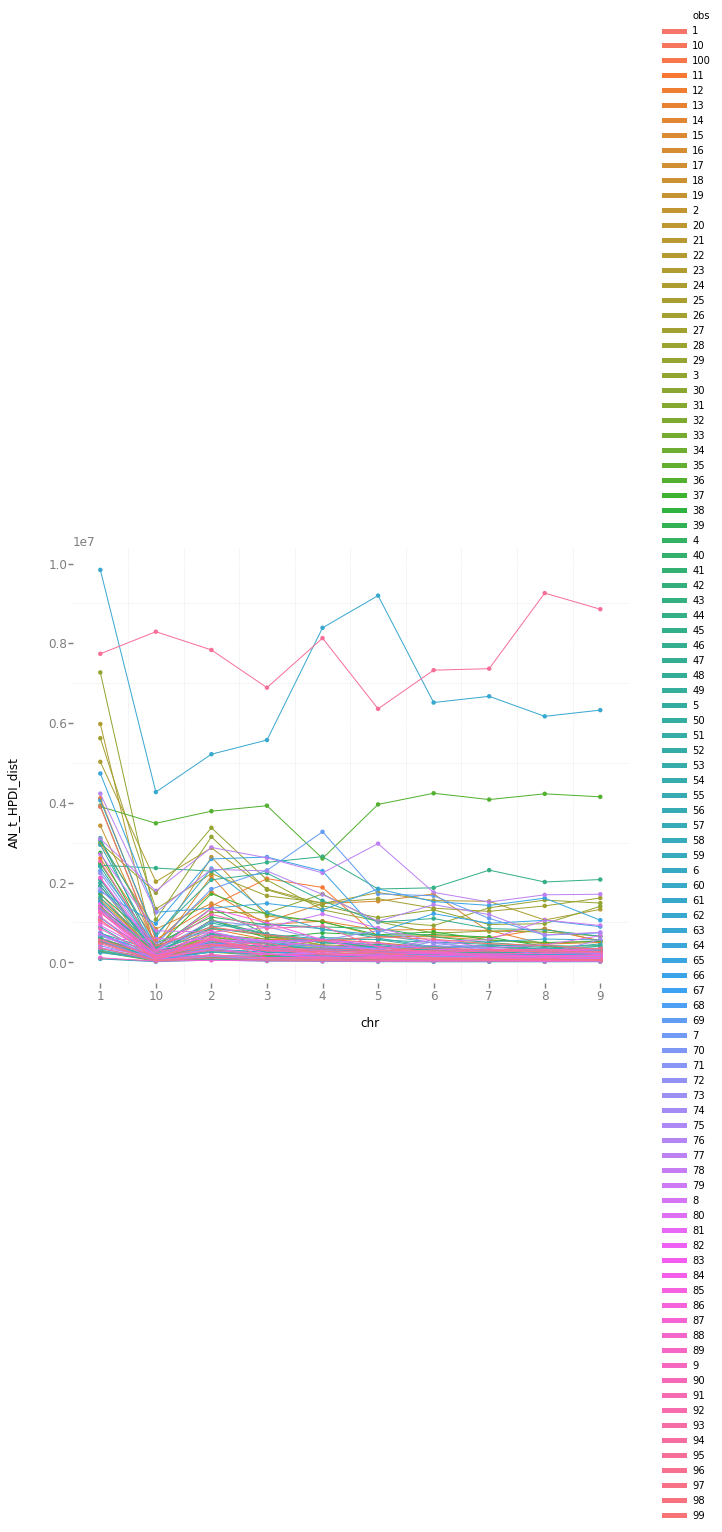

<ggplot: (-9223372036562292750)>


In [36]:
for param in parameters:
    HPDI_dist_name = '{}_HPDI_dist'.format(param)
    plot = lineplot_estimate_dist(param, combined_PosteriorCharacteristics_observed_df, HPDI_dist_name)    
    print(plot)

### Posterior Densities

Example of posterior density of from one observed set.

In [ ]:
virdis_colors = []

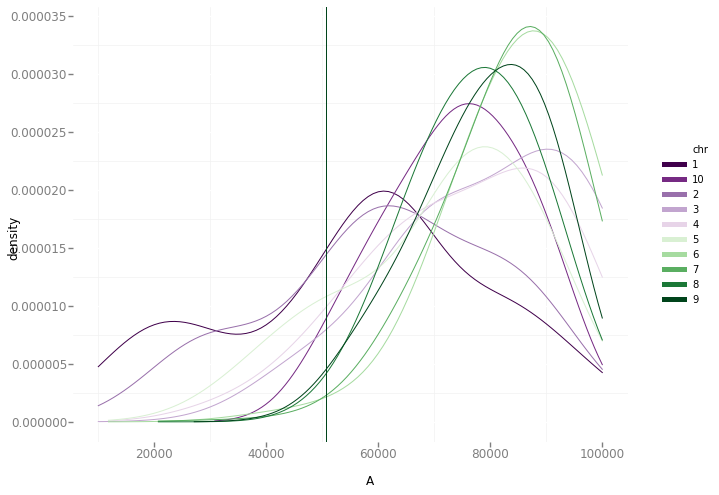

<ggplot: (-9223372036563191657)>


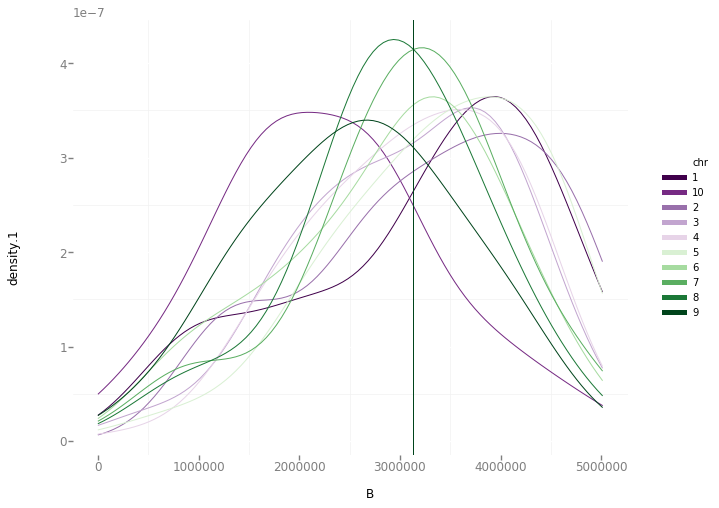

<ggplot: (-9223372029294292876)>


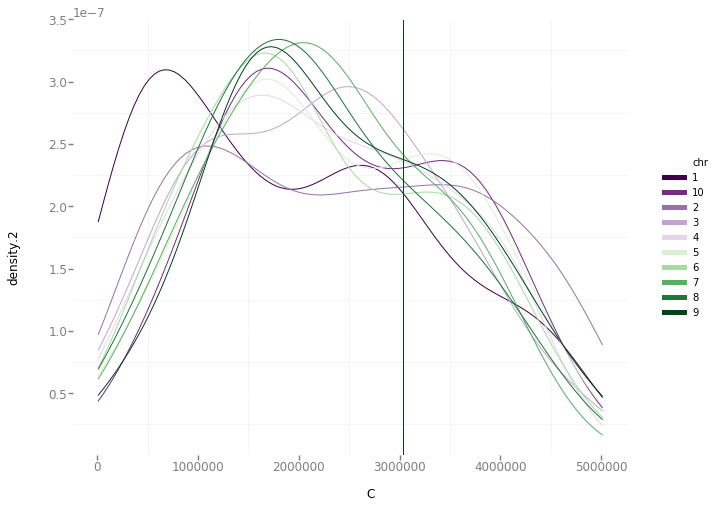

<ggplot: (-9223372029301578773)>


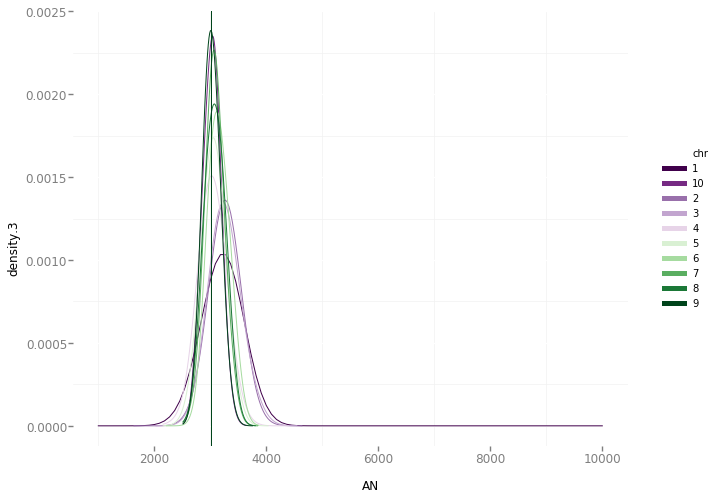

<ggplot: (-9223372029300537414)>


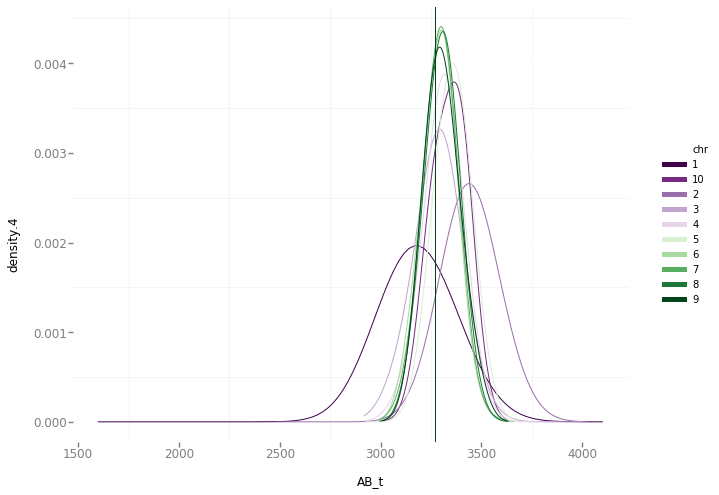

<ggplot: (-9223372029298999934)>


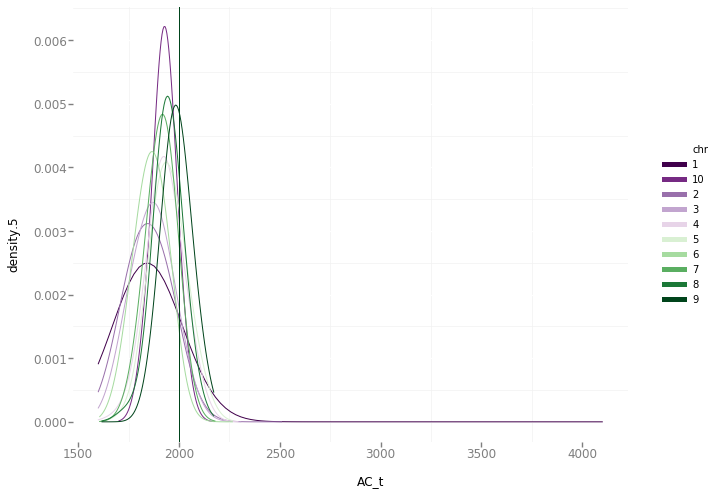

<ggplot: (-9223372029302102647)>


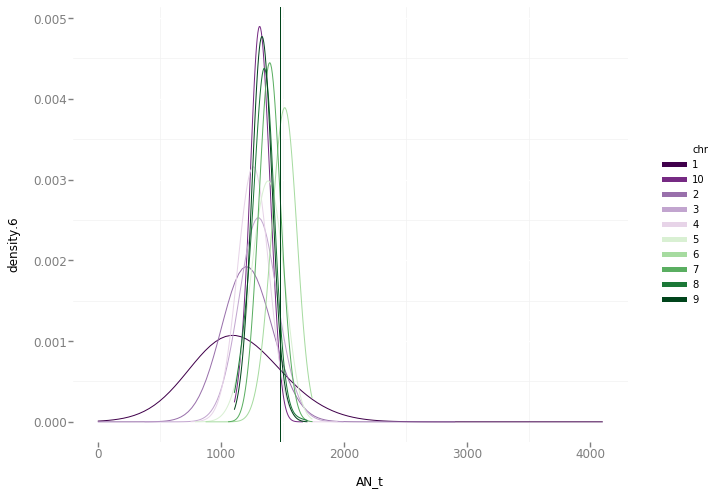

<ggplot: (-9223372029294627093)>


In [108]:
PosteriorDensities_obs1_df = combined_PosteriorDensities_df.loc[combined_PosteriorDensities_df['obs'] == str(1)]
true_values_df = combined_PosteriorCharacteristics_observed_df.loc[combined_PosteriorCharacteristics_observed_df['obs'] == str(1)].loc[combined_PosteriorCharacteristics_observed_df['chr'] == str(1)]

def density_plot(param, PosteriorDensities_df, true_value):
    density = list(PosteriorDensities_obs1_df)[PosteriorDensities_obs1_df.columns.get_loc(param)+1]
    plot = ggplot(aes(x = param, y = density, colour = 'chr'), data = PosteriorDensities_df) + \
        geom_line() + \
        geom_vline(x = true_value) + \
        scale_color_brewer(type='div', palette=2) + \
        theme_bw()
    return plot

for param in parameters:
    plot = density_plot(param, PosteriorDensities_obs1_df, true_values_df[param])
    print(plot)